In [1]:
# Import necessary tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# First, grab tables from other notebooks
%store -r awayTable
%store -r homeTable
%store -r awayMatchup
%store -r homeMatchup

In [3]:
# Working with the following variables:
awayMatchup.columns

Index(['gameId', 'date', 'season', 'week', 'team_x', 'homeAway', 'stadium',
       'roof', 'surface', 'avgPf', 'avgOvr_x', 'avgOff', 'avgPass', 'avgPblk',
       'avgRecv', 'avgRun', 'avgRblk', 'totalDvoa_x', 'offDvoa', 'stDvoa',
       'overUnder', 'pa', 'totalScore', 'team_y', 'avgPa', 'avgOvr_y',
       'avgDef', 'avgRdef', 'avgPrsh', 'avgCov', 'totalDvoa_y', 'defDvoa',
       'ptsMatchup', 'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup',
       'runMatchup', 'offDvoaMatchup', 'totalDvoaMatchup', 'pf'],
      dtype='object')

In [4]:
# Get result coulmn -> either over, under, or push
awayMatchup.loc[awayMatchup.totalScore > awayMatchup.overUnder, 'result'] = 'over'
awayMatchup.loc[awayMatchup.totalScore == awayMatchup.overUnder, 'result'] = 'push'
awayMatchup.loc[awayMatchup.totalScore < awayMatchup.overUnder, 'result'] = 'under'
homeMatchup.loc[homeMatchup.totalScore > homeMatchup.overUnder, 'result'] = 'over'
homeMatchup.loc[homeMatchup.totalScore == homeMatchup.overUnder, 'result'] = 'push'
homeMatchup.loc[homeMatchup.totalScore < homeMatchup.overUnder, 'result'] = 'under'

In [5]:
# How many games went over, under, or pushed?
homeMatchup['result'].value_counts()

over     1350
under    1341
push       45
Name: result, dtype: int64

count    1350.000000
mean       29.304444
std         9.666564
min         0.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        62.000000
Name: pf, dtype: float64


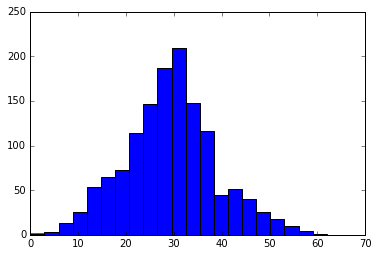

31    127
27    101
24     92
34     78
30     67
38     66
28     57
Name: pf, dtype: int64

In [6]:
# What happens for both home teams and away teams when the game goes OVER the set total?
# What happens for both home teams and away teams when the game goes UNDER the set total?
# Plot the distributions and get summary statistics for each scenario

homeOvers = homeMatchup[homeMatchup['result'] == 'over']['pf']
homeOvers = homeOvers.reset_index()
print(homeOvers['pf'].describe())
plt.hist(homeOvers['pf'],bins=21)
plt.show()
homeOvers['pf'].value_counts()[:7]

count    1350.000000
mean       26.197778
std         9.386290
min         0.000000
25%        20.000000
50%        26.000000
75%        33.000000
max        59.000000
Name: pf, dtype: float64


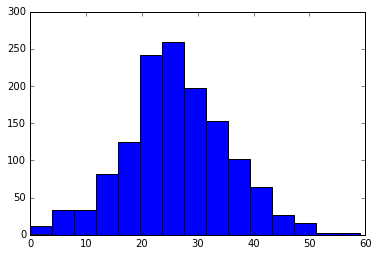

24    108
27     96
20     84
23     81
17     74
31     66
34     66
Name: pf, dtype: int64

In [7]:
awayOvers = awayMatchup[awayMatchup['result'] == 'over']['pf']
awayOvers = awayOvers.reset_index()
print(awayOvers['pf'].describe())
plt.hist(awayOvers['pf'],bins=15)
plt.show()
awayOvers['pf'].value_counts()[:7]

count    1341.000000
mean       18.189411
std         8.300058
min         0.000000
25%        13.000000
50%        18.000000
75%        24.000000
max        48.000000
Name: pf, dtype: float64


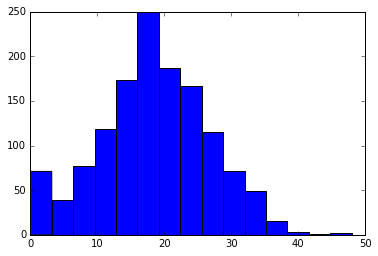

20    122
17    112
13    101
10     93
23     79
24     79
16     76
Name: pf, dtype: int64

In [8]:
homeUnders = homeMatchup[homeMatchup['result'] == 'under']['pf']
homeUnders = homeUnders.reset_index()
print(homeUnders['pf'].describe())
plt.hist(homeUnders['pf'],bins=15)
plt.show()
homeUnders['pf'].value_counts()[:7]

count    1341.000000
mean       16.214765
std         7.901641
min         0.000000
25%        10.000000
50%        16.000000
75%        21.000000
max        42.000000
Name: pf, dtype: float64


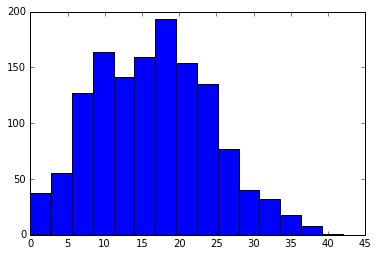

17    139
10    123
13    121
20     94
16     77
24     73
7      66
Name: pf, dtype: int64

In [9]:
awayUnders = awayMatchup[awayMatchup['result'] == 'under']['pf']
awayUnders = awayUnders.reset_index()
print(awayUnders['pf'].describe())
plt.hist(awayUnders['pf'],bins=15)
plt.show()
awayUnders['pf'].value_counts()[:7]

In [35]:
homeOvers['pf'].mean()
homeUnders['pf'].mean()
awayOvers['pf'].mean()
awayUnders['pf'].mean()

16.214765100671141

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x=)

In [44]:
df = pd.DataFrame([['home','over',homeOvers['pf'].mean()],['home','under',homeUnders['pf'].mean()],['away','over',awayOvers['pf'].mean()],['away','under',awayUnders['pf'].mean()]],columns=['ha','ou','mean'])

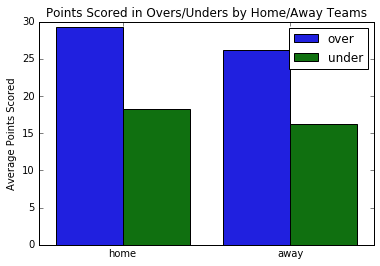

In [53]:
sns.barplot(data=df,x='ha',y='mean',hue='ou')
plt.xlabel('')
plt.ylabel('Average Points Scored')
plt.title('Points Scored in Overs/Unders by Home/Away Teams')
plt.legend(title='')
plt.show()

In [10]:
# We can see a considerable difference in the points scored when the games go over the total vs. when they go under.

In [11]:
# What's the average score of games that go over? Under?

print(homeMatchup[homeMatchup['result'] == 'over']['totalScore'].mean())
print(homeMatchup[homeMatchup['result'] == 'under']['totalScore'].mean())

55.5022222222
34.4041759881


In [12]:
# This leads us to ask, what is the average over/under of games that go over? Under?

print(homeMatchup[homeMatchup['result'] == 'over']['overUnder'].mean())
print(homeMatchup[homeMatchup['result'] == 'under']['overUnder'].mean())

44.1944444444
44.6051454139


In [13]:
# GAMES WITH LOW/HIGH TOTALS
# Do games with high/low set totals tend to go over/under their set total more often?

In [14]:
highTotalsHome = homeMatchup[homeMatchup['overUnder'] >= 48.5]
highTotalsAway = awayMatchup[awayMatchup['overUnder'] >= 48.5]
highTotalsHome['result'].value_counts()

under    254
over     236
push       7
Name: result, dtype: int64

In [15]:
lowTotalsHome = homeMatchup[homeMatchup['overUnder'] <= 40]
lowTotalsAway = awayMatchup[awayMatchup['overUnder'] <= 40]
lowTotalsHome['result'].value_counts()

over     260
under    207
push      10
Name: result, dtype: int64

In [16]:
# It seems as though high totals tend to go UNDER more, and low totals seem to go OVER more

In [26]:
from scipy import stats

In [29]:
# In high total games, do teams score more? In low total games, do teams score less?

print(highTotalsHome['pf'].mean())
print(highTotalsAway['pf'].mean())

27.4486921529
24.1187122736


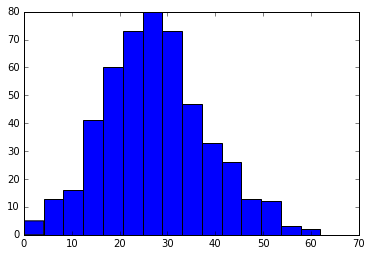

In [25]:
plt.hist(highTotalsHome['pf'],bins=15)
plt.show()

In [27]:
stats.shapiro(highTotalsHome['pf'])

(0.9891473650932312, 0.0009710799204185605)

In [18]:
print(lowTotalsHome['pf'].mean())
print(lowTotalsAway['pf'].mean())

21.1949685535
18.5995807128


In [ ]:
# The answer is 'yes', on average.

In [ ]:
# Let's check out the actual points scored distributions for home and away teams in high/low total games

count    497.000000
mean      27.448692
std       10.889006
min        0.000000
25%       20.000000
50%       27.000000
75%       34.000000
max       62.000000
Name: pf, dtype: float64


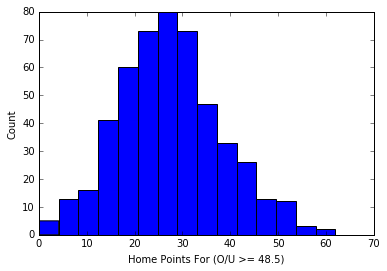

In [19]:
print(highTotalsHome['pf'].describe())
plt.hist(highTotalsHome['pf'].values,bins=15)
plt.xlabel('Home Points For (O/U >= 48.5)')
plt.ylabel('Count')
plt.show()

count    497.000000
mean      24.118712
std        9.617901
min        0.000000
25%       17.000000
50%       24.000000
75%       31.000000
max       52.000000
Name: pf, dtype: float64


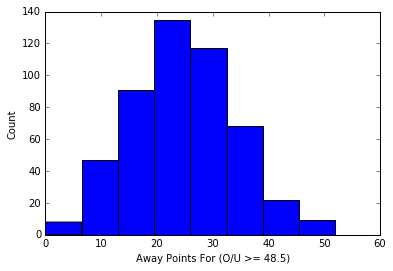

In [20]:
print(highTotalsAway['pf'].describe())
plt.hist(highTotalsAway['pf'].values,bins=8)
plt.xlabel('Away Points For (O/U >= 48.5)')
plt.ylabel('Count')
plt.show()

count    477.000000
mean      21.194969
std        9.969161
min        0.000000
25%       14.000000
50%       21.000000
75%       27.000000
max       59.000000
Name: pf, dtype: float64


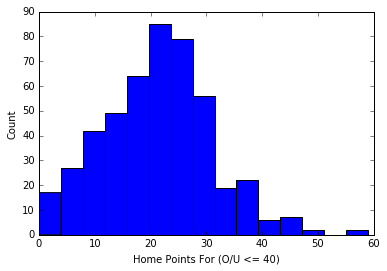

In [21]:
print(lowTotalsHome['pf'].describe())
plt.hist(lowTotalsHome['pf'].values,bins=15)
plt.xlabel('Home Points For (O/U <= 40)')
plt.ylabel('Count')
plt.show()

count    477.000000
mean      18.599581
std       10.185931
min        0.000000
25%       10.000000
50%       17.000000
75%       24.000000
max       49.000000
Name: pf, dtype: float64


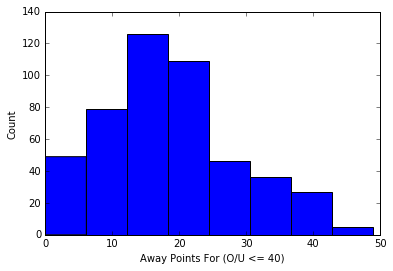

In [22]:
print(lowTotalsAway['pf'].describe())
plt.hist(lowTotalsAway['pf'].values,bins=8)
plt.xlabel('Away Points For (O/U <= 40)')
plt.ylabel('Count')
plt.show()

In [ ]:
# We notice some right skew on a few of the above distributions

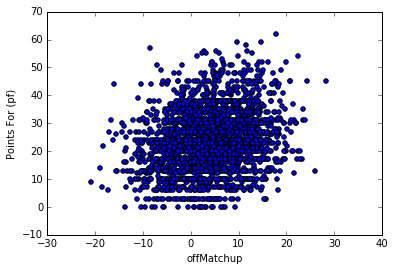

In [49]:
# Next, let's look at how one of our variables, offMatchup, is correlated with pf
plt.scatter(homeMatchup['offMatchup'],homeMatchup['pf'])
plt.xlabel('offMatchup')
plt.ylabel('Points For (pf)')
plt.show()

In [50]:
# We notice some slightly positive correlation
# Let's confirm this:
np.corrcoef(homeMatchup['offMatchup'], homeMatchup['pf'])

array([[ 1.        ,  0.23599347],
       [ 0.23599347,  1.        ]])

In [70]:
# We see that there is, indeed, some positive correlation between a team's 
# matchup and the number of points they score. Let's investigate further

# Home teams with offMatchup >= 10 -> points scored descriptive stats
homeMatchup[homeMatchup['offMatchup'] >=10]['pf'].describe()

count    565.000000
mean      27.007080
std       10.610109
min        3.000000
25%       20.000000
50%       27.000000
75%       34.000000
max       62.000000
Name: pf, dtype: float64

In [71]:
# Home teams with offMatchup <= -2 -> points scored descriptive stats
homeMatchup[homeMatchup['offMatchup'] <=-2]['pf'].describe()

count    543.000000
mean      19.898711
std        9.801671
min        0.000000
25%       13.000000
50%       20.000000
75%       26.000000
max       57.000000
Name: pf, dtype: float64

In [72]:
# Away teams with offMatchup >= 10 -> points scored descriptive stats
awayMatchup[awayMatchup['offMatchup'] >=10]['pf'].describe()

count    595.000000
mean      24.401681
std       10.206207
min        0.000000
25%       17.000000
50%       24.000000
75%       31.000000
max       56.000000
Name: pf, dtype: float64

In [73]:
# Away teams with offMatchup <= -2 -> points scored descriptive stats
awayMatchup[awayMatchup['offMatchup'] <=-2]['pf'].describe()

count    519.000000
mean      17.527938
std        9.425930
min        0.000000
25%       10.000000
50%       17.000000
75%       24.000000
max       44.000000
Name: pf, dtype: float64

In [97]:
# What happens when an away team plays against a team with
# a very good coverage defense?
awayMatchup[awayMatchup['avgCov'] >= 73]['result'].value_counts()

under    51
over     30
Name: result, dtype: int64

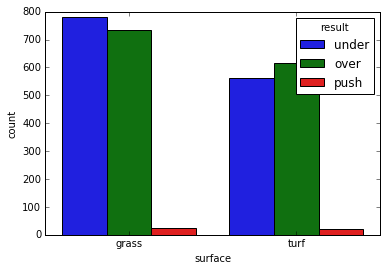

In [31]:
sns.countplot(data=homeMatchup,x='surface',hue='result')
plt.show()

In [ ]:
# The following code is scrap code, and should be ignored.
# Was just exploring further

count    2736.000000
mean       63.017032
std         5.469915
min        45.428571
25%        59.357143
50%        62.957143
75%        66.742857
max        81.414286
Name: avgCov, dtype: float64


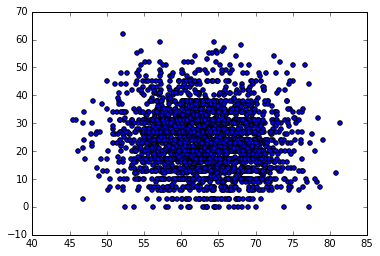

In [23]:
print(homeMatchup['avgCov'].describe())
plt.scatter(homeMatchup['avgCov'], homeMatchup['pf'])
plt.show()

count    2736.000000
mean       62.810845
std         5.449733
min        45.357143
25%        59.039286
50%        62.785714
75%        66.617857
max        81.342857
Name: avgCov, dtype: float64


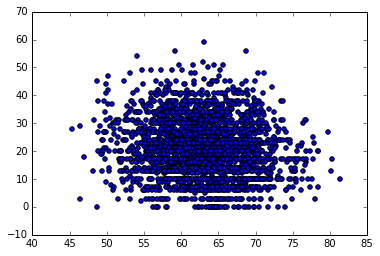

In [24]:
print(awayMatchup['avgCov'].describe())
plt.scatter(awayMatchup['avgCov'], awayMatchup['pf'])
plt.show()

In [47]:
np.corrcoef(homeMatchup['avgCov'], homeMatchup['pf'])

array([[ 1.        , -0.08411616],
       [-0.08411616,  1.        ]])

In [25]:
homeMatchup[homeMatchup['avgCov'] <=59]['pf'].describe()

count    644.000000
mean      25.023292
std       10.642403
min        0.000000
25%       17.000000
50%       24.000000
75%       31.000000
max       62.000000
Name: pf, dtype: float64

In [26]:
homeMatchup[homeMatchup['avgCov'] >= 66]['pf'].describe()

count    797.000000
mean      22.603513
std       10.712712
min        0.000000
25%       14.000000
50%       22.000000
75%       30.000000
max       58.000000
Name: pf, dtype: float64

In [27]:
awayMatchup[awayMatchup['avgCov'] <=59]['pf'].describe()

count    678.000000
mean      22.550147
std        9.943696
min        0.000000
25%       16.000000
50%       22.000000
75%       30.000000
max       54.000000
Name: pf, dtype: float64

In [96]:
awayMatchup[awayMatchup['avgCov'] >=73]['pf'].describe()

count    81.000000
mean     17.172840
std       8.049519
min       0.000000
25%      10.000000
50%      17.000000
75%      23.000000
max      38.000000
Name: pf, dtype: float64

In [95]:
awayMatchup[awayMatchup['avgCov'] >= 73]['result'].value_counts()

under    51
over     30
Name: result, dtype: int64

count    565.000000
mean      27.007080
std       10.610109
min        3.000000
25%       20.000000
50%       27.000000
75%       34.000000
max       62.000000
Name: pf, dtype: float64

In [31]:
homeMatchup[homeMatchup['offMatchup'] <=-2]['pf'].describe()

count    543.000000
mean      19.898711
std        9.801671
min        0.000000
25%       13.000000
50%       20.000000
75%       26.000000
max       57.000000
Name: pf, dtype: float64

In [32]:
awayMatchup[awayMatchup['offMatchup'] >=10]['pf'].describe()

count    595.000000
mean      24.401681
std       10.206207
min        0.000000
25%       17.000000
50%       24.000000
75%       31.000000
max       56.000000
Name: pf, dtype: float64

In [33]:
awayMatchup[awayMatchup['offMatchup'] <=-2]['pf'].describe()

count    519.000000
mean      17.527938
std        9.425930
min        0.000000
25%       10.000000
50%       17.000000
75%       24.000000
max       44.000000
Name: pf, dtype: float64

In [34]:
homeMatchup[homeMatchup['offMatchup'] >=10]['result'].value_counts()

under    279
over     277
push       9
Name: result, dtype: int64

In [35]:
awayMatchup[awayMatchup['offMatchup'] >=10]['result'].value_counts()

under    293
over     290
push      12
Name: result, dtype: int64

In [36]:
homeMatchup['pf'].mean()

23.743055555555557

In [37]:
awayMatchup['pf'].mean()

21.226973684210527

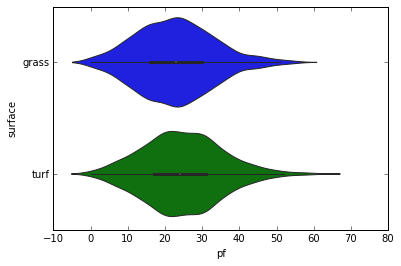

In [38]:
sns.violinplot(x=homeMatchup['pf'],y=homeMatchup['surface'])
plt.show()

In [39]:
awayMatchup['pf'].groupby(awayMatchup['surface']).mean()

surface
grass    21.364759
turf     21.050083
Name: pf, dtype: float64

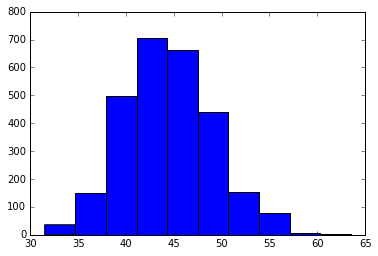

In [40]:
plt.hist(homeMatchup['overUnder'])
plt.show()

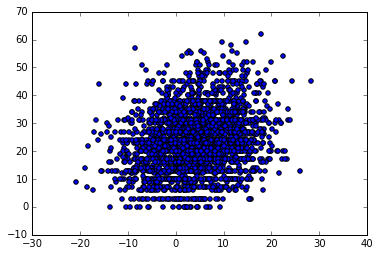

In [41]:
plt.scatter(homeMatchup['offMatchup'],homeMatchup['pf'])
plt.show()

In [44]:
np.corrcoef(homeMatchup['offMatchup'], homeMatchup['pf'])

array([[ 1.        ,  0.23599347],
       [ 0.23599347,  1.        ]])

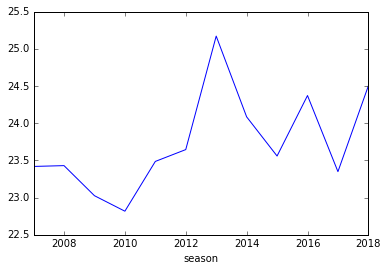

In [8]:
homeMatchup['pf'].groupby(homeMatchup['season']).mean().plot(kind='line')
plt.show()

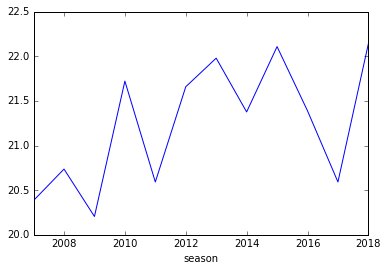

In [9]:
awayMatchup['pf'].groupby(awayMatchup['season']).mean().plot(kind='line')
plt.show()

In [10]:
awayMatchup[awayMatchup['avgPf'] <= 18]['pf'].mean()

17.849442379182157

In [11]:
awayMatchup[(awayMatchup['avgPf'] > 18) & (awayMatchup['avgPf'] <= 21)]['pf'].mean()

19.965888689407539

In [12]:
awayMatchup[(awayMatchup['avgPf'] > 21) & (awayMatchup['avgPf'] <= 24)]['pf'].mean()

21.20967741935484

In [13]:
awayMatchup[(awayMatchup['avgPf'] > 24) & (awayMatchup['avgPf'] <= 27)]['pf'].mean()

22.44337811900192

In [14]:
awayMatchup[(awayMatchup['avgPf'] > 27)]['pf'].mean()

25.02

In [15]:
homeMatchup[homeMatchup['avgPf'] <= 18]['pf'].mean()

19.515151515151516

In [16]:
homeMatchup[(homeMatchup['avgPf'] > 18) & (homeMatchup['avgPf'] <= 21)]['pf'].mean()

22.010204081632654

In [17]:
homeMatchup[(homeMatchup['avgPf'] > 21) & (homeMatchup['avgPf'] <= 24)]['pf'].mean()

24.251184834123222

In [18]:
homeMatchup[(homeMatchup['avgPf'] > 24) & (homeMatchup['avgPf'] <= 27)]['pf'].mean()

25.600790513833992

In [19]:
homeMatchup[(homeMatchup['avgPf'] > 27)]['pf'].mean()

27.879417879417879

In [20]:
awayMatchup[awayMatchup['avgPa'] <= 18]['pf'].mean()

19.138686131386862

In [21]:
awayMatchup[(awayMatchup['avgPa'] > 18) & (awayMatchup['avgPa'] <= 21)]['pf'].mean()

19.708333333333332

In [22]:
awayMatchup[(awayMatchup['avgPa'] > 21) & (awayMatchup['avgPa'] <= 24)]['pf'].mean()

21.800000000000001

In [23]:
awayMatchup[(awayMatchup['avgPa'] > 24) & (awayMatchup['avgPa'] <= 27)]['pf'].mean()

22.134831460674157

In [24]:
awayMatchup[(awayMatchup['avgPa'] > 27)]['pf'].mean()

23.334061135371179

In [25]:
homeMatchup[homeMatchup['avgPa'] <= 18]['pf'].mean()

22.243010752688171

In [26]:
homeMatchup[(homeMatchup['avgPa'] > 18) & (homeMatchup['avgPa'] <= 21)]['pf'].mean()

22.753205128205128

In [27]:
homeMatchup[(homeMatchup['avgPa'] > 21) & (homeMatchup['avgPa'] <= 24)]['pf'].mean()

23.693786982248522

In [28]:
homeMatchup[(homeMatchup['avgPa'] > 24) & (homeMatchup['avgPa'] <= 27)]['pf'].mean()

25.230912476722533

In [29]:
homeMatchup[(homeMatchup['avgPa'] > 27)]['pf'].mean()

25.009216589861751

In [30]:
awayMatchup[(awayMatchup['ptsMatchup'] <= 40)]['pf'].mean()

17.388349514563107

In [31]:
awayMatchup[(awayMatchup['ptsMatchup'] > 40) & (awayMatchup['ptsMatchup'] <= 44)]['pf'].mean()

20.072697899838449

In [32]:
awayMatchup[(awayMatchup['ptsMatchup'] > 44) & (awayMatchup['ptsMatchup'] <= 48)]['pf'].mean()

21.772504091653026

In [33]:
awayMatchup[(awayMatchup['ptsMatchup'] > 48) & (awayMatchup['ptsMatchup'] <= 52)]['pf'].mean()

23.037113402061856

In [34]:
awayMatchup[(awayMatchup['ptsMatchup'] > 52)]['pf'].mean()

25.88089330024814

In [35]:
homeMatchup[(homeMatchup['ptsMatchup'] <= 40)]['pf'].mean()

19.622356495468278

In [36]:
homeMatchup[(homeMatchup['ptsMatchup'] > 40) & (homeMatchup['ptsMatchup'] <= 44)]['pf'].mean()

22.552805280528052

In [37]:
homeMatchup[(homeMatchup['ptsMatchup'] > 44) & (homeMatchup['ptsMatchup'] <= 48)]['pf'].mean()

24.473941368078176

In [38]:
homeMatchup[(homeMatchup['ptsMatchup'] > 48) & (homeMatchup['ptsMatchup'] <= 52)]['pf'].mean()

26.136363636363637

In [59]:
homeMatchup[(homeMatchup['ptsMatchup'] > 52)]['pf'].mean()

28.576530612244898

In [40]:
homeMatchup[(homeMatchup['ptsMatchup'] > 52)]

,gameId,date,season,week,team_x,homeAway,stadium,roof,surface,avgPf,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,201811110kan,2018-11-11,2018,10,Kansas City Chiefs,home,Arrowhead Stadium,outdoors,grass,35.285714,...,-0.071,60.285714,9.814286,13.857143,12.000000,10.700000,7.042857,0.487,0.764,26
2,201612240sea,2016-12-24,2016,16,Seattle Seahawks,home,CenturyLink Field,outdoors,turf,23.857143,...,-0.109,54.571429,3.671429,3.042857,7.371429,-10.685714,1.342857,0.063,0.155,31
3,201812300sea,2018-12-30,2018,17,Seattle Seahawks,home,CenturyLink Field,outdoors,turf,30.428571,...,0.018,58.857143,12.185714,13.642857,11.085714,6.485714,6.571429,0.077,0.520,27
9,201812020gnb,2018-12-02,2018,13,Green Bay Packers,home,Lambeau Field,outdoors,grass,24.571429,...,-0.029,53.000000,10.571429,9.085714,17.371429,9.857143,3.314286,0.176,0.489,17
19,201711190htx,2017-11-19,2017,11,Houston Texans,home,NRG Stadium,dome,turf,30.857143,...,-0.021,55.857143,2.842857,5.542857,-0.814286,-1.671429,-0.442857,0.014,0.209,31
32,201710220nwe,2017-10-22,2017,7,New England Patriots,home,Gillette Stadium,outdoors,turf,29.428571,...,0.124,52.857143,4.985714,-8.171429,11.285714,0.028571,-4.414286,0.137,0.014,23
33,201810070pit,2018-10-07,2018,5,Pittsburgh Steelers,home,Heinz Field,outdoors,grass,29.428571,...,0.181,52.285714,3.828571,-0.357143,-5.571429,15.128571,0.642857,-0.168,0.039,41
36,201611130phi,2016-11-13,2016,10,Philadelphia Eagles,home,Lincoln Financial Field,outdoors,grass,24.714286,...,0.080,53.285714,1.100000,-6.628571,7.628571,11.285714,-13.171429,-0.158,0.071,24
42,201811220nor,2018-11-22,2018,12,New Orleans Saints,home,Mercedes-Benz Superdome,dome,turf,39.142857,...,0.209,66.428571,16.714286,6.985714,22.642857,14.785714,5.014286,0.032,0.273,31
50,201812090kan,2018-12-09,2018,14,Kansas City Chiefs,home,Arrowhead Stadium,outdoors,grass,38.428571,...,-0.122,58.000000,6.257143,7.514286,13.857143,9.371429,-1.957143,0.512,0.260,27


In [55]:
homeMatchup.columns

Index(['gameId', 'date', 'season', 'week', 'team_x', 'homeAway', 'stadium',
       'roof', 'surface', 'avgPf', 'avgOvr_x', 'avgOff', 'avgPass', 'avgPblk',
       'avgRecv', 'avgRun', 'avgRblk', 'totalDvoa_x', 'offDvoa', 'stDvoa',
       'overUnder', 'pa', 'totalScore', 'team_y', 'avgPa', 'avgOvr_y',
       'avgDef', 'avgRdef', 'avgPrsh', 'avgCov', 'totalDvoa_y', 'defDvoa',
       'ptsMatchup', 'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup',
       'runMatchup', 'offDvoaMatchup', 'totalDvoaMatchup', 'pf'],
      dtype='object')

In [50]:
%store -r features

In [56]:
features.insert(2,'avgRecv')

In [57]:
corr = homeMatchup[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,offDvoaMatchup,avgRecv,stDvoa,runMatchup,pblkMatchup,ovrMatchup,totalDvoaMatchup,passMatchup,offMatchup,ptsMatchup,pf
offDvoaMatchup,1,0.464802,0.0792095,-0.0768149,0.0445729,0.159731,0.16848,0.216242,0.132368,0.175412,0.172356
avgRecv,0.464802,1,0.0120248,0.0452699,0.0854617,0.443973,0.340532,0.514736,0.499767,0.478144,0.193689
stDvoa,0.0792095,0.0120248,1,0.00797092,0.0146837,0.0514683,0.185425,0.0353229,0.0124472,0.114562,0.0854604
runMatchup,-0.0768149,0.0452699,0.00797092,1,-0.014675,0.318868,0.187224,0.157335,0.561324,0.283606,0.0796019
pblkMatchup,0.0445729,0.0854617,0.0146837,-0.014675,1,0.22817,0.160051,0.0729054,0.295714,0.154357,0.102824
ovrMatchup,0.159731,0.443973,0.0514683,0.318868,0.22817,1,0.695742,0.610908,0.693633,0.617805,0.233422
totalDvoaMatchup,0.16848,0.340532,0.185425,0.187224,0.160051,0.695742,1,0.465104,0.473857,0.587692,0.269303
passMatchup,0.216242,0.514736,0.0353229,0.157335,0.0729054,0.610908,0.465104,1,0.762152,0.638371,0.234116
offMatchup,0.132368,0.499767,0.0124472,0.561324,0.295714,0.693633,0.473857,0.762152,1,0.64654,0.235993
ptsMatchup,0.175412,0.478144,0.114562,0.283606,0.154357,0.617805,0.587692,0.638371,0.64654,1,0.285279


In [58]:
corr = awayMatchup[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,offDvoaMatchup,avgRecv,stDvoa,runMatchup,pblkMatchup,ovrMatchup,totalDvoaMatchup,passMatchup,offMatchup,ptsMatchup,pf
offDvoaMatchup,1,0.456294,0.0438029,-0.0572846,0.0386995,0.186499,0.178425,0.224991,0.145469,0.185901,0.121729
avgRecv,0.456294,1,-0.00973244,0.0227772,0.0635511,0.440418,0.32339,0.522111,0.495672,0.483077,0.178475
stDvoa,0.0438029,-0.00973244,1,-0.0136609,0.00718014,0.029566,0.15686,0.00592466,-0.0141906,0.0839382,0.0284542
runMatchup,-0.0572846,0.0227772,-0.0136609,1,-0.0211786,0.308102,0.207647,0.1548,0.542278,0.280744,0.12586
pblkMatchup,0.0386995,0.0635511,0.00718014,-0.0211786,1,0.235913,0.153557,0.0599073,0.287949,0.155539,0.0254453
ovrMatchup,0.186499,0.440418,0.029566,0.308102,0.235913,1,0.695742,0.616786,0.701385,0.614794,0.238515
totalDvoaMatchup,0.178425,0.32339,0.15686,0.207647,0.153557,0.695742,1,0.475858,0.491936,0.581535,0.280353
passMatchup,0.224991,0.522111,0.00592466,0.1548,0.0599073,0.616786,0.475858,1,0.771839,0.645901,0.256675
offMatchup,0.145469,0.495672,-0.0141906,0.542278,0.287949,0.701385,0.491936,0.771839,1,0.660737,0.249005
ptsMatchup,0.185901,0.483077,0.0839382,0.280744,0.155539,0.614794,0.581535,0.645901,0.660737,1,0.292522
